In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from SDAproject.data_fetching.yahoo_finance import fetch_yahoo_finance_data
from SDAproject.data_preprocessing.data_cleaning import clean_data, add_date_parts
from SDAproject.data_preprocessing.feature_engineering import generate_moving_averages, calculate_volatility, calculate_RSI
from SDAproject.data_preprocessing.data_normalization import normalize_data
from SDAproject.model_training.xgboost_model import train_xgboost_model
from SDAproject.model_training.lightgbm_model import train_lightgbm_model
from SDAproject.model_evaluation import evaluate_continuous_model

In [3]:
tickers = ['AAPL']  # Example ticker
data = fetch_yahoo_finance_data(tickers, '2020-01-01', '2021-01-01')
data = data.reset_index()

[*********************100%%**********************]  1 of 1 completed



In [4]:
cleaned_data = clean_data(data)
with_features = generate_moving_averages(cleaned_data, [5, 10, 20])
with_features = calculate_volatility(with_features, 10)
with_features = calculate_RSI(with_features, 14)
final_data = normalize_data(with_features, cols = list(filter(lambda x: x != 'Date', with_features.columns)))

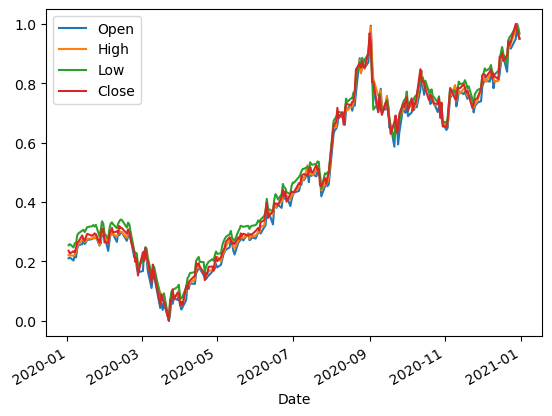

In [5]:
final_data.plot(x='Date', y=['Open', 'High', 'Low', 'Close'])
final_data = add_date_parts(final_data, 'Date')

In [6]:
target_column = 'Close'
X = final_data.drop(columns=[target_column])
y = final_data[target_column]

In [7]:
train_size = int(len(final_data) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [8]:
xgboost_model = train_xgboost_model(pd.concat([X_train, y_train], axis=1), target_column)
lightgbm_model = train_lightgbm_model(pd.concat([X_train, y_train], axis=1), target_column)

d:\software\miniconda3\envs\SDA_project\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\software\miniconda3\envs\SDA_project\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\software\miniconda3\envs\SDA_project\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\software\miniconda3\envs\SDA_project\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 468
[LightGBM] [Info] Number of data points in the train set: 126, number of used features: 13
[LightGBM] [Info] Start training from score 0.406065
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

d:\software\miniconda3\envs\SDA_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\software\miniconda3\envs\SDA_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\software\miniconda3\envs\SDA_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\software\miniconda3\envs\SDA_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\software\miniconda3\envs\SDA_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\software\miniconda3\envs\SDA_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\software\miniconda3\envs\SDA_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\software\miniconda3\envs\SDA_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` i

In [9]:
xgb_metrics = evaluate_continuous_model(xgboost_model, X_test, y_test)
lgb_metrics = evaluate_continuous_model(lightgbm_model, X_test, y_test)
exclude_sharpe_ratio = lambda d: {k: v for k, v in d.items() if k != 'sharpe_ratio'}
xgb_metrics_without_sharpe_ratio = exclude_sharpe_ratio(xgb_metrics)
lgb_metrics_without_sharpe_ratio = exclude_sharpe_ratio(lgb_metrics)

d:\software\miniconda3\envs\SDA_project\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\software\miniconda3\envs\SDA_project\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\software\miniconda3\envs\SDA_project\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\software\miniconda3\envs\SDA_project\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is

Text(0.5, 0.98, 'Model Performance')

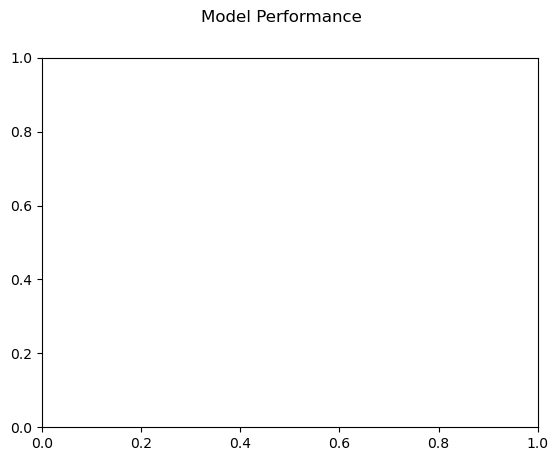

In [10]:
ax1: Axes
fig, ax1 = plt.subplots()
fig.suptitle('Model Performance')

In [11]:
def plot_metrics(metrics: dict, ax, **kwargs):
    ax.scatter(list(metrics.keys()), list(metrics.values()), **kwargs)

In [12]:
plot_metrics(xgb_metrics_without_sharpe_ratio, ax1, label='XGBoost', color='red')
plot_metrics(lgb_metrics_without_sharpe_ratio, ax1, label='LightGBM', color='blue')
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Value (for metrics other than Sharpe Ratio)')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
plot_metrics({'Sharpe Ratio': xgb_metrics['sharpe_ratio']}, ax2, label='XGBoost', linestyle='dashed', color='red')
plot_metrics({'Sharpe Ratio': lgb_metrics['sharpe_ratio']}, ax2, label='LightGBM', linestyle='dashed', color='blue')
ax2.set_ylabel('Sharpe Ratio')

Text(0, 0.5, 'Sharpe Ratio')

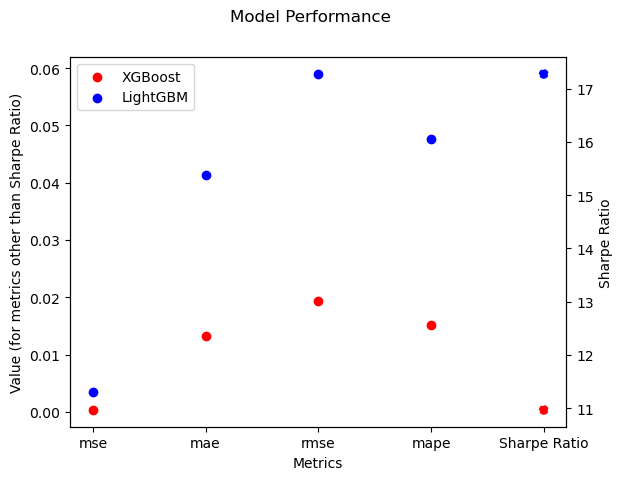

In [13]:
fig